In [1]:
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

/var/folders/f2/gq8xgm9x491cqwtct_tgpy0h0000gn/T/ipykernel_5267/1667656876.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [2]:
import torch
print("Using torch", torch.__version__)

Using torch 2.2.1


In [3]:
torch.manual_seed(42)

In [4]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


In [5]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [6]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [7]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [8]:
np_arr = np.array(x)
print(np_arr)

[[[0.88226926 0.91500396 0.38286376 0.95930564]
  [0.3904482  0.60089535 0.25657248 0.7936413 ]
  [0.94077146 0.13318592 0.9345981  0.59357965]]

 [[0.86940444 0.5677153  0.74109405 0.4294045 ]
  [0.8854429  0.57390445 0.26658005 0.62744915]
  [0.26963168 0.44136357 0.29692084 0.8316855 ]]]


In [9]:
tensor = torch.from_numpy(np_arr)
print(tensor)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [10]:
tensor = torch.arange(10)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

#conversion of tensor to numpy on tensor happens on CPU

PyTorch tensor: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Numpy array: [0 1 2 3 4 5 6 7 8 9]


In [11]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)
y = x1+x2
print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [12]:
#in place operation

x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)
x2.mul_(x1)
print(x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])
tensor([[0.7446, 1.6727, 0.7453],
        [0.2135, 0.9027, 0.3476]])


In [13]:
x = torch.arange(1,7)
print("X", x)

X tensor([1, 2, 3, 4, 5, 6])


In [14]:
x = x.view(2,3)
x.shape

torch.Size([2, 3])

In [15]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [16]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [17]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [18]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


In [19]:
x = torch.arange(12).view(3, 4)
print("X", x)


X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [20]:
print(x[:,1])

tensor([1, 5, 9])


In [21]:
print(x[0,:])

tensor([0, 1, 2, 3])


In [22]:
print(x[0])

tensor([0, 1, 2, 3])


In [23]:
print(x[2,:-1])

tensor([ 8,  9, 10])


In [24]:
print(x[1:3, :])

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [25]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [26]:
x.requires_grad = True
print(x.requires_grad)

True


In [27]:
#in place grads
x.requires_grad_(True)
print(x.requires_grad)

True


In [28]:

x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [29]:
a = x+2
b = a**2
c = b+3
y = c.mean()
print(y)

tensor(12.6667, grad_fn=<MeanBackward0>)


In [30]:
y.backward()

In [31]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


In [32]:
device = torch.device("mps")
print(device)
x = torch.ones(1, device=device)
print (x)

mps
tensor([1.], device='mps:0')


In [33]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='mps:0')


In [49]:

x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")
## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = time.time()
_ = torch.matmul(x, x)
end = time.time()
print(f"GPU time: {(end - start):6.5f}s") # Milliseconds to seconds

CPU time: 0.16374s
GPU time: 0.00021s


In [51]:
import torch.nn as nn
import torch.nn.functional as F

In [52]:
class MyModule(nn.Module):

    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

In [53]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [54]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [55]:
for name, param in model.named_parameters():
    print(f"Parameter{name}, shape: {param.shape}")

Parameterlinear1.weight, shape: torch.Size([4, 2])
Parameterlinear1.bias, shape: torch.Size([4])
Parameterlinear2.weight, shape: torch.Size([1, 4])
Parameterlinear2.bias, shape: torch.Size([1])


In [56]:
import torch.utils.data as data

In [57]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [58]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([ 0.9340, -0.1083]), tensor(1))


In [59]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

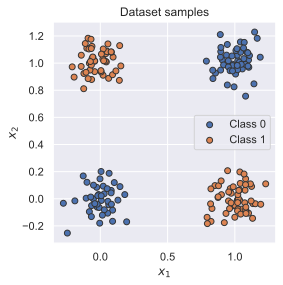

In [60]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [61]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)


In [62]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 1.1661,  1.1826],
        [ 1.1086,  1.0561],
        [ 1.0476,  0.9909],
        [ 0.9003,  0.0302],
        [ 0.0910,  0.9141],
        [ 1.1420,  0.8469],
        [ 1.0818, -0.0618],
        [ 0.7958, -0.1831]])
Data labels torch.Size([8]) 
 tensor([0, 0, 0, 1, 1, 0, 1, 1])


In [ ]:
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
for batch in data_loader:
    data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
    print("Data inputs", data_inputs.shape, "\n", data_inputs)
    print("Data labels", data_labels.shape, "\n", data_labels)

In [64]:
loss_module = nn.BCEWithLogitsLoss()

In [65]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [66]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [67]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [68]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [70]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

In [71]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 3.3657,  2.6570],
        [ 0.4089,  0.4262],
        [ 2.1378, -1.7607],
        [-1.7317, -2.6040]], device='mps:0')), ('linear1.bias', tensor([-1.4548,  0.4642,  1.3326,  3.1549], device='mps:0')), ('linear2.weight', tensor([[ 4.5806, -0.4220, -2.8078,  4.3843]], device='mps:0')), ('linear2.bias', tensor([-1.6318], device='mps:0'))])


In [72]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")